In [1]:
from IPython.core import display
from io import BytesIO
from PIL import Image
import numpy as np
import random
import os
import neurolab as nl
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import time

%matplotlib inline

In [2]:
os.chdir("..")
%pwd

u'/home/joe/Documents/pycode/compOpt_Project'

In [3]:
def getData(path):
    "Splits the data into X and y both being numpy arrays (data already normalized)"
    f = open(path)
    lines = f.readlines()
    f.close
    
    images = []
    classification = []
    for line in lines:
        nums = line.split()
        classification.append(nums[0])
        images.append([((float (val))) for val in nums[1:]])
    return (np.array(classification),np.array(images))

def display_grayscale(arr):
    "SIDE EFFECTS: INTENDED TO BE USED IN IPYTHON NOTEBOOK"
    img = np.array([round(val,2) for val in arr]).astype('uint8').reshape((16,16))
    plt.imshow(img, cmap = cm.Greys_r)
    return Image.fromarray(img)

In [4]:
classification,trainData = getData("ZipDigits.train.txt")
classificationTest,testData = getData("ZipDigits.test.txt")

In [8]:
# Create network with 256 inputs, 2 neurons in hidden layer
# And 256 in output layer

ann = nl.load('ann60.net')
size = 100
subData = trainData[:size]
#inputParams = [[-1, 1]] * len(subData[0])
#ann = nl.net.newff(inputParams, [2,256])
#ann.trainf = nl.train.train_rprop

In [ ]:
# Train process
#last condition epochs=100000000,show=100000,
err = ann.train(subData, subData,epochs=100000000,show=100000, goal=1)

test


<PIL.Image.Image image mode=L size=16x16 at 0x7F8C10669C68>

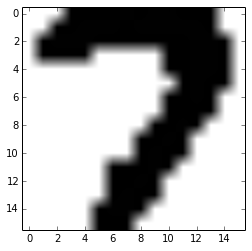

In [33]:
ind = random.randrange(0,size)
sub = ann.sim(subData[ind:ind+1])
print "test"
display_grayscale(sub[0])

<PIL.Image.Image image mode=L size=16x16 at 0x7F8C0F3779E0>

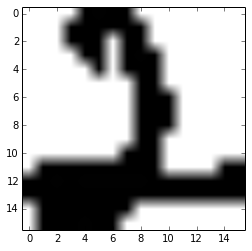

In [50]:
ind = random.randrange(size,size+200)
display_grayscale(trainData[ind])

<PIL.Image.Image image mode=L size=16x16 at 0x7F8C106D8440>

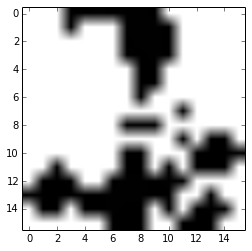

In [51]:
exampleOutput = ann.sim(trainData[ind:ind+1])
#exampleTest = 
display_grayscale(exampleOutput[0])

#example.save('example1OUTPUT.png')

In [17]:
trainFeatures = ann.sim(trainData)

In [20]:
testFeatures = ann.sim(testData)

In [164]:
ann.save('ann60.net')